# KPMG Virtual internship 

## Task 01 : Data Quality Assessment

Reading the dataset

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cusdemo = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx","CustomerDemographic",header=1)

C:\Users\Owais Akram\AppData\Local\Temp\ipykernel_4316\271150414.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  cusdemo = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx","CustomerDemographic",header=1)


In [3]:
cusdemo.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
tra = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx","Transactions",header=1)

In [5]:
tra.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [6]:
cusadd = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx","CustomerAddress",header= 1)

In [7]:
cusadd.head(5)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


Checking for dataframes sizes, null values, duplicated values

In [8]:
# to check for basic information
cusdemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [9]:
# to check for null values
cusdemo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [10]:
# to check for duplicates
cusdemo.duplicated().sum()

0

Here we can see that dataset has no duplicated values but some columns has null values, Furthermore column "default" has garbage value in it. Now we will analyize it further in prespective of data quality and clean it in process

In [11]:
# Replacing the lastname null values with doe
cusdemo["last_name"].fillna("Doe",inplace = True)

In [12]:
# checking the median date of birth
median_dob = cusdemo["DOB"].median()

In [13]:
# Replacing the null values with median date of birth
cusdemo["DOB"].fillna(median_dob,inplace = True)

In [14]:
# Checking the median tenure value 
median_tenure = cusdemo["tenure"].median()

In [15]:
# Replacing the null values with median values
cusdemo["tenure"].fillna(median_tenure,inplace =True)

In [16]:
# Default column has garbage values so we will drop it
cusdemo = cusdemo.drop("default",axis = 1)

In [17]:
cusdemo["job_title"].value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [18]:
cusdemo["job_industry_category"].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [19]:
cusdemo["customer_id"].value_counts()

1       1
2672    1
2659    1
2660    1
2661    1
       ..
1339    1
1340    1
1341    1
1342    1
4000    1
Name: customer_id, Length: 4000, dtype: int64

In [20]:
#checking for gender column
cusdemo["gender"].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

Here we can see that data does not follow the filling pattern, female is written as Female,f and femal where as male is written as Male,M. Third gender is written as U it should be written as unspecified for better understanding

In [21]:
# clearing the data redundancy
cusdemo["gender"]=cusdemo["gender"].replace({"F":"Female","Femal":"Female","M":"Male","U":"Unspecified"})

In [22]:
cusdemo["gender"].value_counts()

Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64

In [23]:
x = cusdemo.columns

In [24]:
for i in x:
    print(cusdemo[i].value_counts())
    print("--------------------------------------------")
    

1       1
2672    1
2659    1
2660    1
2661    1
       ..
1339    1
1340    1
1341    1
1342    1
4000    1
Name: customer_id, Length: 4000, dtype: int64
--------------------------------------------
Max         5
Tobe        5
Timmie      5
Kippy       4
Pail        4
           ..
Katy        1
Hakim       1
Fanchon     1
Jeanette    1
Sarene      1
Name: first_name, Length: 3139, dtype: int64
--------------------------------------------
Doe          125
Pristnor       3
Ramsdell       3
Gimber         2
Roelofs        2
            ... 
Whittock       1
Carwithen      1
Blas           1
Dearlove       1
Oldland        1
Name: last_name, Length: 3726, dtype: int64
--------------------------------------------
Female         2039
Male           1873
Unspecified      88
Name: gender, dtype: int64
--------------------------------------------
16    56
19    56
67    54
20    54
2     50
      ..
8     28
95    27
85    27
86    27
92    24
Name: past_3_years_bike_related_purchases, Lengt

Now we will check the similar for the dataframe of Transactions

In [25]:
tra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [26]:
tra.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [27]:
tra.duplicated().sum()

0

Here we can see that dataset has no duplicated values but some columns has null values, Furthermore column "product_first_sold_date" has numbers instead of datetime in it. Now we will analyize it further in prespective of data quality and clean it in process

In [28]:
col = tra.columns

In [29]:
for i in col:
    print(tra[i].value_counts())
    print("----------**-------------**-------------")

1        1
13331    1
13338    1
13337    1
13336    1
        ..
6667     1
6666     1
6665     1
6664     1
20000    1
Name: transaction_id, Length: 20000, dtype: int64
----------**-------------**-------------
0      1378
3       354
1       311
35      268
38      267
       ... 
71      137
8       136
16      136
100     130
47      121
Name: product_id, Length: 101, dtype: int64
----------**-------------**-------------
2183    14
2476    14
1068    14
1672    13
2912    13
        ..
898      1
2352     1
1846     1
3279     1
1757     1
Name: customer_id, Length: 3494, dtype: int64
----------**-------------**-------------
2017-02-14    82
2017-08-18    82
2017-10-15    76
2017-01-31    73
2017-12-19    71
              ..
2017-01-12    38
2017-12-07    37
2017-03-29    36
2017-09-25    35
2017-10-19    32
Name: transaction_date, Length: 364, dtype: int64
----------**-------------**-------------
1.0    9829
0.0    9811
Name: online_order, dtype: int64
----------**-------------**-

Here we can see that column "product_first_sold_date" datatype is float, whereas it should be datetime.
Customer Id total count is 3494 where as in customer demographic we had 4000 entries which means not all customers have made transactionns

In [30]:
# converting float to datetime data type
reference_date = pd.to_datetime('1900-01-01')
tra["product_first_sold_date"]=reference_date + pd.to_timedelta(tra["product_first_sold_date"],unit = "D")

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arrays\timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arrays\timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


In [31]:
null_values = tra[tra["brand"].isnull()]

In [32]:
null_values

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaT
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaT
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaT
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaT
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaT
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaT
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaT
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaT


Now we will analyze and check CustomerAddress dataset

In [33]:
cusadd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [34]:
cusadd.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [35]:
dup = cusadd.duplicated()
cusadd[dup].sum()

customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64

Here we can see that dataframe has no null and duplicated values

In [36]:
# checking for data inconsistencies
for col in cusadd.columns:
    print(cusadd[col].value_counts())
    print("*---------------**--------------*")

1       1
2676    1
2663    1
2664    1
2665    1
       ..
1343    1
1344    1
1345    1
1346    1
4003    1
Name: customer_id, Length: 3999, dtype: int64
*---------------**--------------*
3 Mariners Cove Terrace      2
3 Talisman Place             2
64 Macpherson Junction       2
359 Briar Crest Road         1
4543 Service Terrace         1
                            ..
5063 Shopko Pass             1
09 Hagan Pass                1
87897 Lighthouse Bay Pass    1
294 Lawn Junction            1
320 Acker Drive              1
Name: address, Length: 3996, dtype: int64
*---------------**--------------*
2170    31
2155    30
2145    30
2153    29
3977    26
        ..
3808     1
3114     1
4721     1
4799     1
3089     1
Name: postcode, Length: 873, dtype: int64
*---------------**--------------*
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64
*---------------**--------------*
Australia    399

Here we can see that column"State" has inconsistency, here state name is written in full and in short also. It should be in one format

In [37]:
# changing state column into one format
cusadd["state"]=cusadd["state"].replace({"New South Wales":"NSW","Victoria":"VIC"})

In [38]:
cusadd["state"].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

# Task 02: Please recommend which of these 1000 new customers should be targeted to drive the most value to the organization.

In [39]:
# reading the new dataset
newcus = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx","NewCustomerList",header=1)

C:\Users\Owais Akram\AppData\Local\Temp\ipykernel_4316\2763529688.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  newcus = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx","NewCustomerList",header=1)


In [40]:
newcus.head(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [41]:
# checking for basic info about the dataset
newcus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [42]:
newcus.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [43]:
newcus.duplicated().sum()

0

Here we can see that we do not have any duplicated values where as null values are present

In [44]:
newcus["last_name"].fillna("Doe",inplace = True)

In [45]:
# checking the median age
median_dobnew = newcus["DOB"].median()

In [46]:
median_dobnew

Timestamp('1972-03-24 00:00:00')

In [47]:
newcus["DOB"].fillna(median_dobnew, inplace = True)

In [47]:
columns_to_drop = ["Unnamed: 16","Unnamed: 17","Unnamed: 18","Unnamed: 19","Unnamed: 20"]
newcus.drop(columns = columns_to_drop , inplace = True)

In [48]:
for i in newcus.columns:
    print(newcus[i].value_counts())
    print("***--------------***-------------***")

Rozamond     3
Dorian       3
Mandie       3
Inglebert    2
Ricki        2
            ..
Diego        1
Lucilia      1
Eddy         1
Caron        1
Sylas        1
Name: first_name, Length: 940, dtype: int64
***--------------***-------------***
Doe          29
Eade          2
Sissel        2
Borsi         2
Shoesmith     2
             ..
O'Moylane     1
Axtens        1
Moxted        1
Conrad        1
Duffill       1
Name: last_name, Length: 962, dtype: int64
***--------------***-------------***
Female    513
Male      470
U          17
Name: gender, dtype: int64
***--------------***-------------***
60    20
59    18
42    17
70    17
11    16
      ..
19     5
9      5
92     5
85     4
20     3
Name: past_3_years_bike_related_purchases, Length: 100, dtype: int64
***--------------***-------------***
1998-02-05    2
1978-01-15    2
1977-11-08    2
1951-11-28    2
1979-07-28    2
             ..
1945-08-08    1
1943-08-27    1
1999-10-24    1
1976-01-24    1
1955-10-02    1
Name: DOB, 

Now we have completed most of the data by filling Null values, cleaning the data redundancy etc. Now we will delete those null values that can not be filled without skewing the data

In [50]:
# updated dataframes


In [49]:
#deleting null values that can not be filled
cusdemon = cusdemo.dropna()

In [50]:
tran = tra.dropna()

In [51]:
cusaddn = cusadd.dropna()

In [52]:
newcusn = newcus.dropna()

In [55]:
cusdemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2943 entries, 0 to 3997
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2943 non-null   int64         
 1   first_name                           2943 non-null   object        
 2   last_name                            2943 non-null   object        
 3   gender                               2943 non-null   object        
 4   past_3_years_bike_related_purchases  2943 non-null   int64         
 5   DOB                                  2943 non-null   datetime64[ns]
 6   job_title                            2943 non-null   object        
 7   job_industry_category                2943 non-null   object        
 8   wealth_segment                       2943 non-null   object        
 9   deceased_indicator                   2943 non-null   object        
 10  owns_car    

In [53]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [57]:
cusaddn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [54]:
newcusn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           735 non-null    object        
 1   last_name                            735 non-null    object        
 2   gender                               735 non-null    object        
 3   past_3_years_bike_related_purchases  735 non-null    int64         
 4   DOB                                  735 non-null    datetime64[ns]
 5   job_title                            735 non-null    object        
 6   job_industry_category                735 non-null    object        
 7   wealth_segment                       735 non-null    object        
 8   deceased_indicator                   735 non-null    object        
 9   owns_car                             735 non-null    object        
 10  tenure        

In [55]:
# joining new customer to transaction dataset
merge_tcd  = pd.merge(tran,cusdemon, on  = "customer_id")

In [56]:
merged = pd.merge(merge_tcd,cusaddn, on = "customer_id")

In [57]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14454 entries, 0 to 14453
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       14454 non-null  int64         
 1   product_id                           14454 non-null  int64         
 2   customer_id                          14454 non-null  int64         
 3   transaction_date                     14454 non-null  datetime64[ns]
 4   online_order                         14454 non-null  float64       
 5   order_status                         14454 non-null  object        
 6   brand                                14454 non-null  object        
 7   product_line                         14454 non-null  object        
 8   product_class                        14454 non-null  object        
 9   product_size                         14454 non-null  object        
 10  list_price

In [58]:
correlation_matrix = merged.corr()

C:\Users\Owais Akram\AppData\Local\Temp\ipykernel_4316\3038142350.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged.corr()


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'transaction_id'),
  Text(1.5, 0, 'product_id'),
  Text(2.5, 0, 'customer_id'),
  Text(3.5, 0, 'online_order'),
  Text(4.5, 0, 'list_price'),
  Text(5.5, 0, 'standard_cost'),
  Text(6.5, 0, 'past_3_years_bike_related_purchases'),
  Text(7.5, 0, 'tenure'),
  Text(8.5, 0, 'postcode'),
  Text(9.5, 0, 'property_valuation')])

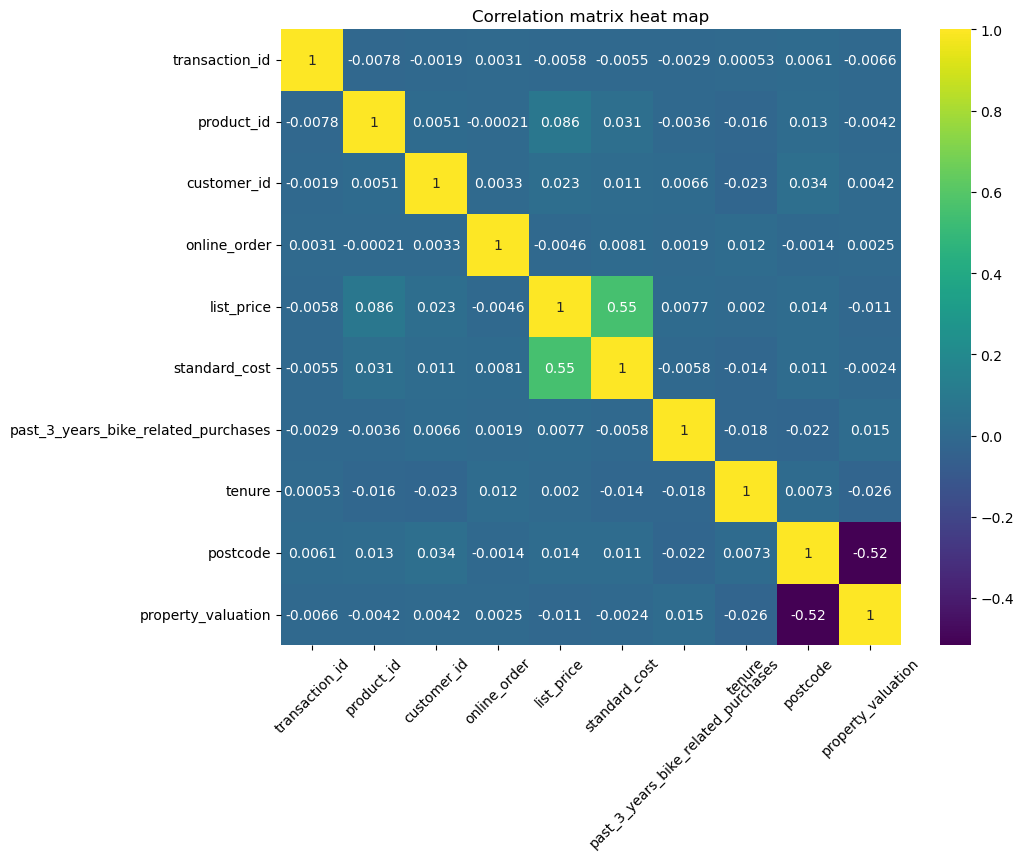

In [59]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "viridis" )
plt.title("Correlation matrix heat map")
plt.xticks(rotation=45)


In [60]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14454 entries, 0 to 14453
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       14454 non-null  int64         
 1   product_id                           14454 non-null  int64         
 2   customer_id                          14454 non-null  int64         
 3   transaction_date                     14454 non-null  datetime64[ns]
 4   online_order                         14454 non-null  float64       
 5   order_status                         14454 non-null  object        
 6   brand                                14454 non-null  object        
 7   product_line                         14454 non-null  object        
 8   product_class                        14454 non-null  object        
 9   product_size                         14454 non-null  object        
 10  list_price

In [61]:
#dropping deceased persons from the analysis
merged = merged[merged["deceased_indicator"]!="Y"]

In [62]:
grp = merged.groupby(["state","gender"],as_index= False)["owns_car"].count()

In [63]:
grp

,state,gender,owns_car
0,NSW,Female,3870
1,NSW,Male,3560
2,NSW,Unspecified,200
3,QLD,Female,1543
4,QLD,Male,1567
5,QLD,Unspecified,80
6,VIC,Female,1714
7,VIC,Male,1792
8,VIC,Unspecified,120


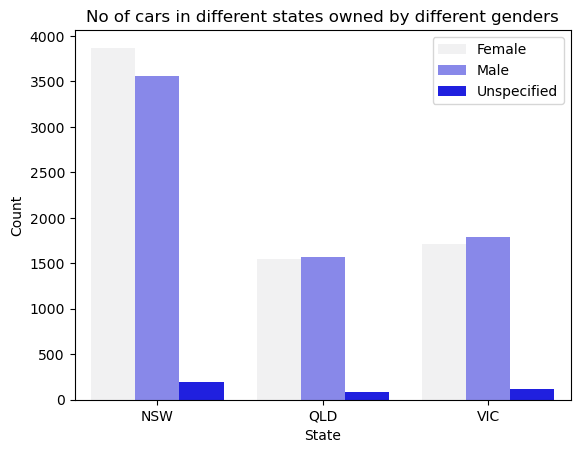

In [64]:
sns.barplot(data = grp, x = "state", y="owns_car", hue="gender", color = "blue")
plt.title("No of cars in different states owned by different genders")
plt.xlabel("State")
plt.ylabel("Count")
plt.legend()
plt.show()

here we can see that majority of car owners are female from NSW followed by Males of NSW.

In [65]:
grp_wealth = merged.groupby(["wealth_segment","gender"],as_index  = False).count()

In [66]:
grp_wealth

,wealth_segment,gender,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,...,job_title,job_industry_category,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,Affluent Customer,Female,1676,1676,1676,1676,1676,1676,1676,1676,...,1676,1676,1676,1676,1676,1676,1676,1676,1676,1676
1,Affluent Customer,Male,1792,1792,1792,1792,1792,1792,1792,1792,...,1792,1792,1792,1792,1792,1792,1792,1792,1792,1792
2,Affluent Customer,Unspecified,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,76,76,76,76
3,High Net Worth,Female,1836,1836,1836,1836,1836,1836,1836,1836,...,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836
4,High Net Worth,Male,1755,1755,1755,1755,1755,1755,1755,1755,...,1755,1755,1755,1755,1755,1755,1755,1755,1755,1755
5,High Net Worth,Unspecified,97,97,97,97,97,97,97,97,...,97,97,97,97,97,97,97,97,97,97
6,Mass Customer,Female,3615,3615,3615,3615,3615,3615,3615,3615,...,3615,3615,3615,3615,3615,3615,3615,3615,3615,3615
7,Mass Customer,Male,3372,3372,3372,3372,3372,3372,3372,3372,...,3372,3372,3372,3372,3372,3372,3372,3372,3372,3372
8,Mass Customer,Unspecified,227,227,227,227,227,227,227,227,...,227,227,227,227,227,227,227,227,227,227


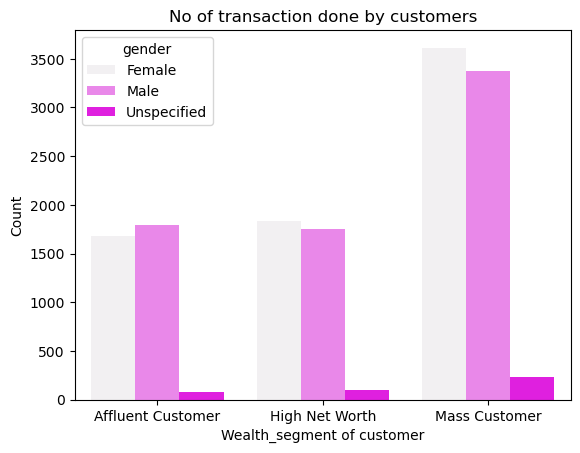

In [67]:
sns.barplot(data = grp_wealth, x = "wealth_segment" , y = "transaction_id", hue = "gender",color = "Magenta")
plt.title("No of transaction done by customers")
plt.xlabel("Wealth_segment of customer")
plt.ylabel("Count")
plt.show()

In [68]:
grp_3years = merged.groupby(["wealth_segment","job_industry_category"],as_index = False)["past_3_years_bike_related_purchases"].count()

In [69]:
grp_3years

,wealth_segment,job_industry_category,past_3_years_bike_related_purchases
0,Affluent Customer,Argiculture,107
1,Affluent Customer,Entertainment,119
2,Affluent Customer,Financial Services,828
3,Affluent Customer,Health,664
4,Affluent Customer,IT,219
5,Affluent Customer,Manufacturing,971
6,Affluent Customer,Property,244
7,Affluent Customer,Retail,312
8,Affluent Customer,Telecommunications,80
9,High Net Worth,Argiculture,151


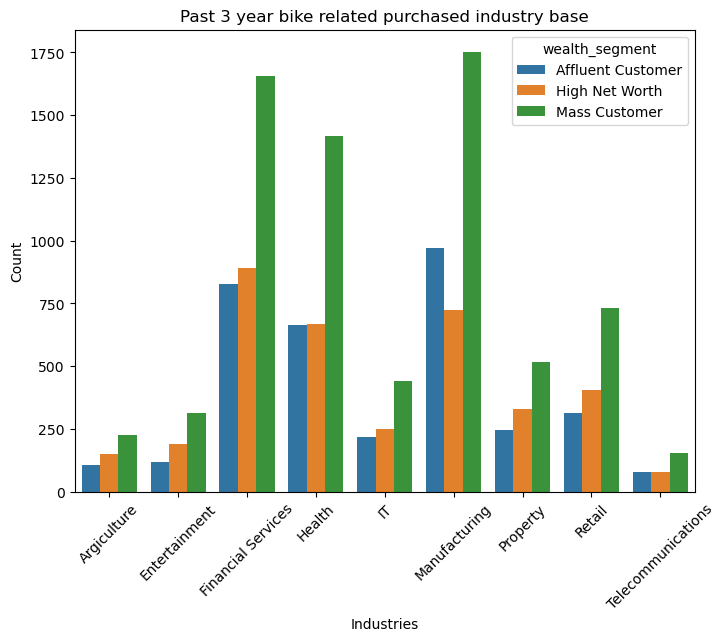

In [70]:
plt.figure(figsize=(8, 6))
sns.barplot(data = grp_3years, x = "job_industry_category",y="past_3_years_bike_related_purchases", hue = "wealth_segment")
plt.title("Past 3 year bike related purchased industry base")
plt.xticks(rotation=45)
plt.xlabel("Industries")
plt.ylabel("Count")
plt.show()

Here we can see that manufacturing industry had the most bike related purchase in the last 3 year followed by financial and health services

In [75]:
grp_3year_state = merged.groupby(["state"],as_index = False)["past_3_years_bike_related_purchases"].sum()

In [76]:
grp_3year_state

,state,past_3_years_bike_related_purchases
0,NSW,380632
1,QLD,157584
2,VIC,172139


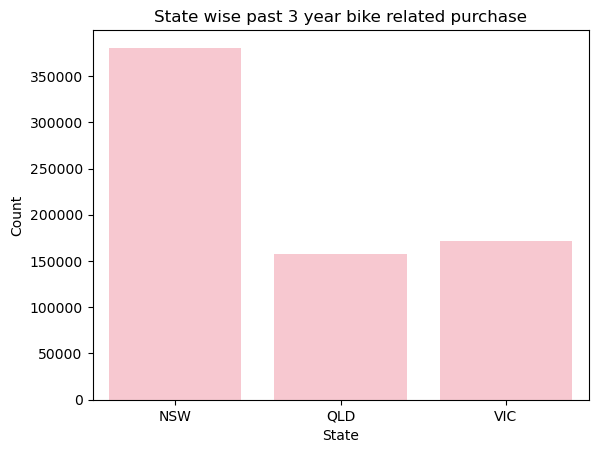

In [81]:
sns.barplot(data = grp_3year_state, x = "state", y="past_3_years_bike_related_purchases",color = "pink")
plt.title("State wise past 3 year bike related purchase")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

Here we can see that the majority of bike related purchase state wise is from NSW

In [84]:
# checking which age bracket shops the most
from datetime import datetime, date
current_date = datetime.now()
merged["age"]=(current_date-merged["DOB"]).astype("<m8[Y]")

In [87]:
# creating age bins to know which age brackets spends the most
bins = [0,18,30,45,60,float("inf")]
labels=["Teens", "Young_Adults", "Middle_Aged_Adults", "Old_Adults", "Old"]
merged['age_group'] = pd.cut(merged["age"], bins=bins, labels=labels)


In [105]:
age_purchase = merged.groupby(["age_group"],as_index = False).count()

In [106]:
age_purchase

,age_group,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,...,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age
0,Teens,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Young_Adults,2272,2272,2272,2272,2272,2272,2272,2272,2272,...,2272,2272,2272,2272,2272,2272,2272,2272,2272,2272
2,Middle_Aged_Adults,4892,4892,4892,4892,4892,4892,4892,4892,4892,...,4892,4892,4892,4892,4892,4892,4892,4892,4892,4892
3,Old_Adults,5301,5301,5301,5301,5301,5301,5301,5301,5301,...,5301,5301,5301,5301,5301,5301,5301,5301,5301,5301
4,Old,1981,1981,1981,1981,1981,1981,1981,1981,1981,...,1981,1981,1981,1981,1981,1981,1981,1981,1981,1981


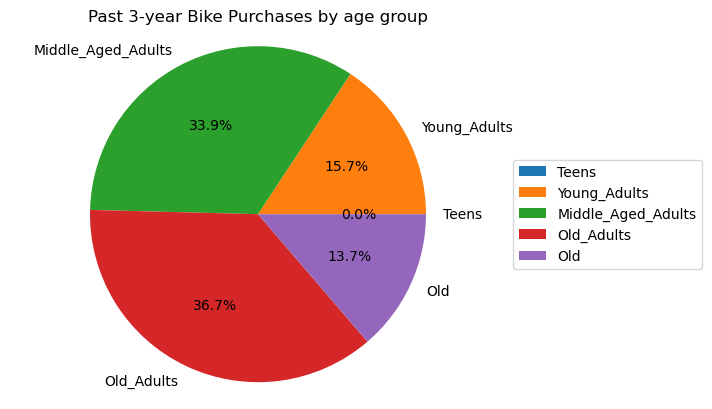

In [109]:
age_purchase["label"] = age_purchase["age_group"]
plt.pie(age_purchase["past_3_years_bike_related_purchases"],labels = age_purchase["label"],autopct="%1.1f%%")
plt.axis("equal")
plt.legend(loc="center left", bbox_to_anchor=(1., 0.5))
plt.title("Past 3-year Bike Purchases by age group")

plt.show()

Here we can see that majority of bike related purchases are from old_adults followed by middle_aged adults

In [110]:
age_gender = merged.groupby(["age_group","gender","wealth_segment"],as_index = False).count()

In [111]:
age_gender

,age_group,gender,wealth_segment,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,...,job_industry_category,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,age
0,Teens,Female,Affluent Customer,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Teens,Female,High Net Worth,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Teens,Female,Mass Customer,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Teens,Male,Affluent Customer,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Teens,Male,High Net Worth,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Teens,Male,Mass Customer,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Teens,Unspecified,Affluent Customer,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Teens,Unspecified,High Net Worth,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Teens,Unspecified,Mass Customer,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Young_Adults,Female,Affluent Customer,307,307,307,307,307,307,307,...,307,307,307,307,307,307,307,307,307,307


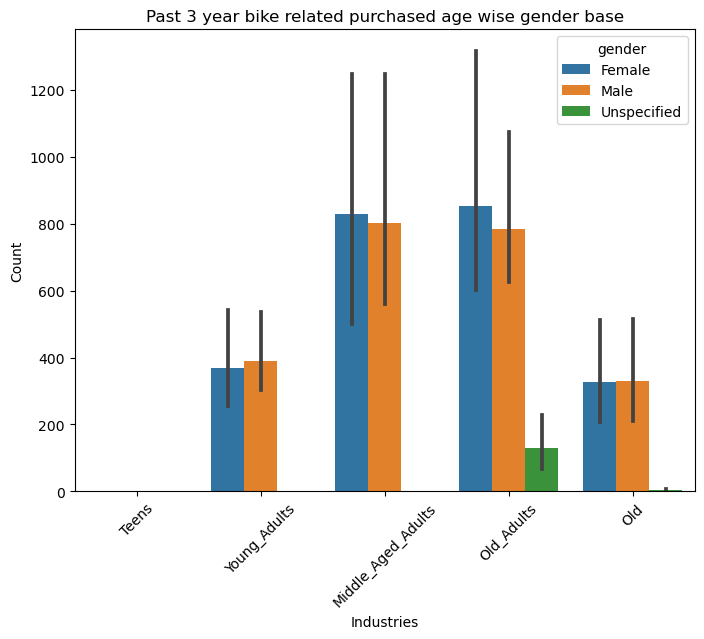

In [115]:
plt.figure(figsize=(8, 6))
sns.barplot(data = age_gender, x = "age_group",y="past_3_years_bike_related_purchases", hue = "gender")
plt.title("Past 3 year bike related purchased age wise gender base")
plt.xticks(rotation=45)
plt.xlabel("Industries")
plt.ylabel("Count")
plt.show()

C:\Users\Owais Akram\AppData\Local\Temp\ipykernel_4316\1094302329.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='past_3_years_bike_related_purchases', hue='gender', data=age_gender, ci=None, palette='pastel',
C:\Users\Owais Akram\AppData\Local\Temp\ipykernel_4316\1094302329.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='past_3_years_bike_related_purchases', hue='wealth_segment', data=age_gender, ci=None, palette='muted',


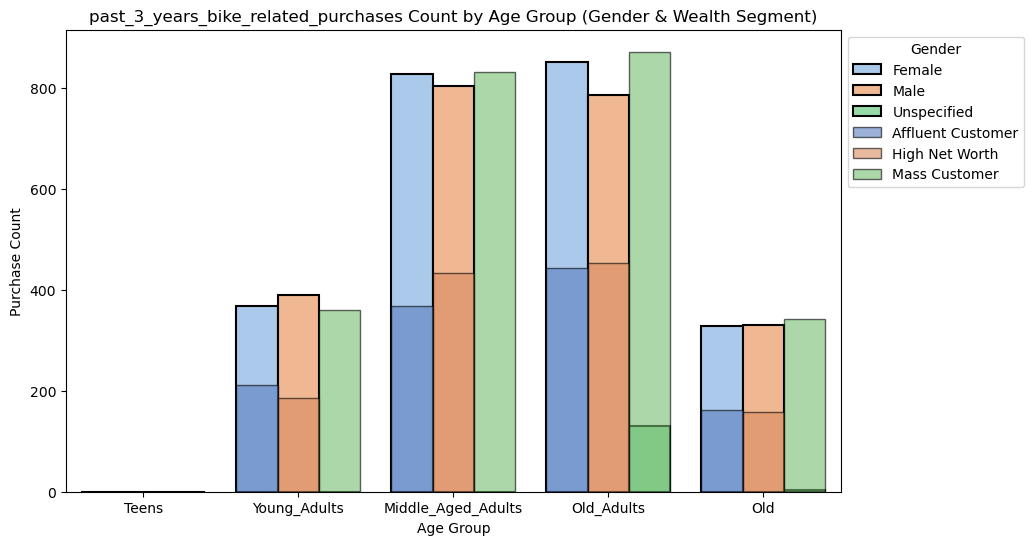

In [123]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

# Using seaborn's barplot to create a nested bar graph with hue for both gender and wealth_segment
sns.barplot(x='age_group', y='past_3_years_bike_related_purchases', hue='gender', data=age_gender, ci=None, palette='pastel',
            edgecolor='k', linewidth=1.5)
sns.barplot(x='age_group', y='past_3_years_bike_related_purchases', hue='wealth_segment', data=age_gender, ci=None, palette='muted',
             alpha=0.6, edgecolor='k', linewidth=1)

# Set the title and labels for x and y axes
plt.title('past_3_years_bike_related_purchases Count by Age Group (Gender & Wealth Segment)')
plt.xlabel('Age Group')
plt.ylabel('Purchase Count')

# Show the plot
plt.legend(title='Gender', bbox_to_anchor=(1, 1))
plt.show()


Here we can see that majority of past 3 year bike related purchases are done female old adults and mass customer followed by female middle aged adults mass customer

In [124]:
import os
current_path = os.getcwd()
file_name = "Cleaned_file.xlsx"
file_path = os.path.join(current_path,file_name)
merged.to_excel(file_path, index = False)